In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection

# users = pd.read_csv("dados_para_correlacoes_juntos.csv", index_col='user_id')
users = pd.read_csv("dados_para_correlacoes_juntos_por_temp.csv", index_col='user_id')
# users['temperamento'] = users['temperamento'].astype('category')
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1660 SUPER'

In [2]:
users

,qtd_posts,media_likes,qtd_posts_positivos,qtd_posts_negativos,qtd_posts_neutros,qtd_posts_possui_emoticon,seguidores,seguidos,proporcao_final_semana,proporcao_meio_semana,proporcao_manha,proporcao_tarde,proporcao_noite,proporcao_madrugada,temperamento
user_id,,,,,,,,,,,,,,,
8,7,176.142857,6,0,1,7,1220,1108,0.4286,0.5714,0.1429,0.4286,0.4286,0.0000,anxious
8,7,176.142857,6,0,1,7,1220,1108,0.4286,0.5714,0.1429,0.4286,0.4286,0.0000,depressive
10,5,9.000000,3,0,2,2,49,60,0.2000,0.8000,0.2000,0.4000,0.2000,0.2000,anxious
10,5,9.000000,3,0,2,2,49,60,0.2000,0.8000,0.2000,0.4000,0.2000,0.2000,cyclothymic
10,5,9.000000,3,0,2,2,49,60,0.2000,0.8000,0.2000,0.4000,0.2000,0.2000,depressive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,49,191.061224,40,0,9,24,1805,919,0.3061,0.6939,0.0204,0.2857,0.5714,0.1224,irritable
1036,49,191.061224,40,0,9,24,1805,919,0.3061,0.6939,0.0204,0.2857,0.5714,0.1224,worrying
1037,2,57.500000,2,0,0,1,342,175,0.5000,0.5000,0.0000,0.5000,0.5000,0.0000,irritable


In [3]:
users['temperamento'].value_counts()

temperamento
depressive     85
irritable      38
cyclothymic    37
hyperthymic    29
anxious        28
worrying       27
Name: count, dtype: int64

In [4]:
train_size = int(0.7 * len(users))
test_size = len(users) - train_size
generator1 = torch.Generator().manual_seed(42)

# train_dataset, test_dataset = torch.utils.data.random_split(users, [train_size, test_size], generator=generator1)

# train_dataset = train_dataset.dataset.iloc[train_dataset.indices].drop(axis=1, columns=['user_id'])
# train_target = train_dataset.pop('temperamento')
# train_tensor = torch.Tensor(train_dataset.values).type(torch.FloatTensor)

# test_dataset = test_dataset.dataset.iloc[test_dataset.indices].drop(axis=1, columns=['user_id'])
# test_target = test_dataset.pop('temperamento')
# test_tensor = torch.Tensor(test_dataset.values).type(torch.FloatTensor)

train_dataset, test_dataset = sklearn.model_selection.train_test_split(users, test_size=test_size, train_size=train_size, random_state=42, stratify=users['temperamento'])

train_dataset = train_dataset#.drop(axis=1, columns=['user_id'])
train_target = train_dataset.pop('temperamento')
train_tensor = torch.Tensor(train_dataset.values).type(torch.FloatTensor)

test_dataset = test_dataset#.drop(axis=1, columns=['user_id'])
test_target = test_dataset.pop('temperamento')
test_tensor = torch.Tensor(test_dataset.values).type(torch.FloatTensor)

In [5]:
test_tensor

tensor([[2.0000e+00, 7.5000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.0000e+01, 6.1700e+01, 4.3000e+01,  ..., 2.4000e-01, 5.0000e-01,
         2.6000e-01],
        [1.0000e+01, 1.0970e+02, 8.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        ...,
        [5.0000e+00, 9.0000e+00, 3.0000e+00,  ..., 4.0000e-01, 2.0000e-01,
         2.0000e-01],
        [1.5000e+01, 2.0440e+02, 4.0000e+00,  ..., 0.0000e+00, 9.3330e-01,
         0.0000e+00],
        [2.0000e+00, 5.7500e+01, 2.0000e+00,  ..., 5.0000e-01, 5.0000e-01,
         0.0000e+00]])

In [6]:
test_target

user_id
1007     depressive
1005    cyclothymic
1001    hyperthymic
253     cyclothymic
1001      irritable
           ...     
268     hyperthymic
272        worrying
10        irritable
109      depressive
1037      irritable
Name: temperamento, Length: 74, dtype: object

In [7]:
train_target

user_id
8           anxious
205        worrying
1002     depressive
59          anxious
1028      irritable
           ...     
202       irritable
187      depressive
126     hyperthymic
225      depressive
268     cyclothymic
Name: temperamento, Length: 170, dtype: object

In [8]:
train_target.unique()

array(['anxious', 'worrying', 'depressive', 'irritable', 'cyclothymic',
       'hyperthymic'], dtype=object)

In [9]:
train_target.value_counts()

temperamento
depressive     59
irritable      26
cyclothymic    26
anxious        20
hyperthymic    20
worrying       19
Name: count, dtype: int64

In [10]:
# train_target_tensor = train_target.map({'worrying': 1,
#                                         'depressive': 2,
#                                         'cyclothymic': 3,
#                                         'hyperthymic': 4,
#                                         'irritable': 5,
#                                         'anxious': 6})



train_target_tensor = list(train_target.map({'worrying': [1, 0, 0, 0, 0, 0],
                                        'depressive': [0, 1, 0, 0, 0, 0],
                                        'cyclothymic': [0, 0, 1, 0, 0, 0],
                                        'hyperthymic': [0, 0, 0, 1, 0, 0],
                                        'irritable': [0, 0, 0, 0, 1, 0],
                                        'anxious': [0, 0, 0, 0, 0, 1]}))

train_target_tensor = torch.Tensor(train_target_tensor)#.float()#.to('cuda')
train_target_tensor

tensor([[0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [11]:
temperaments = len(train_target.unique())
temperaments

6

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(14, 28),
    torch.nn.ReLU(),
    torch.nn.Linear(28, 28),
    torch.nn.ReLU(),
    # torch.nn.Linear(56, 56),
    # torch.nn.ReLU(),
    # torch.nn.Linear(56, 56),
    # torch.nn.ReLU(),
    # torch.nn.Linear(56, 56),
    # torch.nn.ReLU(),
    # torch.nn.Linear(28, 28),
    # torch.nn.ReLU(),
    torch.nn.Linear(28, 14),
    torch.nn.ReLU(),
    torch.nn.Linear(14, 6),
    torch.nn.Softmax(dim=1)
)#.to('cuda')

In [13]:
y_pred = model(train_tensor)
y_pred

tensor([[1.0000e+00, 2.0230e-23, 2.5094e-27, 2.8782e-21, 1.6826e-15, 2.6591e-12],
        [1.0000e+00, 3.2040e-16, 3.9993e-19, 1.6378e-15, 2.1910e-10, 1.6559e-08],
        [1.0000e+00, 1.0187e-18, 1.6304e-22, 3.1484e-18, 1.0544e-12, 1.4031e-09],
        ...,
        [9.9999e-01, 8.2511e-10, 6.9009e-12, 2.1801e-09, 8.2066e-08, 7.0467e-06],
        [9.9930e-01, 1.6763e-06, 1.1305e-07, 4.6347e-06, 6.2966e-05, 6.3326e-04],
        [9.9997e-01, 9.7432e-10, 4.4183e-11, 5.5642e-09, 3.0109e-06, 2.6076e-05]],
       grad_fn=<SoftmaxBackward0>)

In [14]:
loss_fn = torch.nn.CrossEntropyLoss()
# loss = loss_fn(output, label)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 3000
for n in range(num_epochs):
    y_pred = model(train_tensor)
    loss = loss_fn(y_pred, train_target_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred

tensor([[1.0767e-05, 9.6239e-01, 1.0921e-07, 1.7070e-13, 3.7600e-02, 2.7277e-06],
        [5.0912e-01, 4.5314e-01, 9.1934e-08, 7.1730e-12, 7.9687e-04, 3.6937e-02],
        [2.4639e-05, 9.9997e-01, 8.4310e-10, 1.1916e-14, 2.2816e-06, 6.2977e-06],
        ...,
        [1.8879e-05, 5.9932e-01, 7.1036e-03, 3.1133e-05, 3.9350e-01, 3.2040e-05],
        [3.7903e-03, 4.0822e-01, 4.1010e-02, 1.5730e-03, 5.4311e-01, 2.2986e-03],
        [1.3376e-01, 6.2237e-01, 7.9108e-04, 2.4984e-06, 1.7933e-01, 6.3749e-02]],
       grad_fn=<SoftmaxBackward0>)

In [15]:
pd.DataFrame(y_pred.detach().numpy())

,0,1,2,3,4,5
0,1.076729e-05,0.962386,1.092147e-07,1.706961e-13,0.037600,2.727692e-06
1,5.091246e-01,0.453141,9.193438e-08,7.173046e-12,0.000797,3.693730e-02
2,2.463918e-05,0.999967,8.431036e-10,1.191556e-14,0.000002,6.297668e-06
3,7.123219e-11,0.999739,9.913994e-07,4.316596e-11,0.000261,6.030716e-10
4,4.160410e-01,0.152772,4.783886e-05,8.992231e-08,0.012898,4.182417e-01
...,...,...,...,...,...,...
165,1.962425e-04,0.640009,8.096485e-03,7.074370e-05,0.351476,1.517987e-04
166,5.313202e-06,0.973051,1.148201e-03,4.450957e-06,0.025778,1.276029e-05
167,1.887901e-05,0.599318,7.103631e-03,3.113318e-05,0.393496,3.204029e-05
168,3.790271e-03,0.408220,4.100979e-02,1.573032e-03,0.543108,2.298637e-03


In [16]:
torch.argmax(y_pred, dim=1)

tensor([1, 0, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 0, 4, 1, 4, 1, 1,
        4, 4, 1, 1, 1, 1, 5, 4, 1, 1, 0, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 0, 1, 4, 1, 4, 1, 5, 1, 4,
        1, 1, 1, 5, 1, 1, 1, 1, 4, 1, 1, 5, 4, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 4, 1, 1, 1, 1, 1,
        4, 1])

In [17]:
train_target.value_counts()

temperamento
depressive     59
irritable      26
cyclothymic    26
anxious        20
hyperthymic    20
worrying       19
Name: count, dtype: int64

In [18]:
test_target

user_id
1007     depressive
1005    cyclothymic
1001    hyperthymic
253     cyclothymic
1001      irritable
           ...     
268     hyperthymic
272        worrying
10        irritable
109      depressive
1037      irritable
Name: temperamento, Length: 74, dtype: object

In [19]:
model(test_tensor)

tensor([[1.1823e-02, 5.7808e-01, 7.7958e-02, 7.5824e-03, 3.1524e-01, 9.3201e-03],
        [3.2788e-01, 4.3744e-01, 4.4722e-08, 2.4820e-12, 1.2611e-04, 2.3455e-01],
        [9.0705e-05, 7.8193e-01, 2.6335e-05, 2.2439e-09, 2.1793e-01, 1.8643e-05],
        [9.1280e-02, 6.0123e-01, 1.5705e-04, 3.6318e-07, 1.1383e-02, 2.9595e-01],
        [9.0705e-05, 7.8193e-01, 2.6335e-05, 2.2439e-09, 2.1793e-01, 1.8643e-05],
        [4.6279e-03, 6.2367e-01, 1.2657e-02, 2.3893e-04, 3.5669e-01, 2.1147e-03],
        [3.1021e-41, 1.0000e+00, 6.6526e-26, 6.4889e-41, 5.1580e-20, 1.5527e-35],
        [5.9959e-05, 8.7438e-01, 2.4382e-03, 1.2315e-05, 1.2306e-01, 4.4325e-05],
        [5.9410e-03, 2.2680e-01, 1.6193e-03, 4.6595e-06, 7.6439e-01, 1.2428e-03],
        [5.2132e-18, 1.0000e+00, 4.1139e-11, 2.2001e-17, 1.2799e-09, 2.9952e-15],
        [3.3953e-09, 5.1194e-01, 1.2136e-07, 1.7506e-15, 4.8805e-01, 6.3245e-06],
        [2.1987e-05, 9.9997e-01, 7.7904e-10, 1.1156e-14, 2.0246e-06, 5.5666e-06],
        [9.0705e

In [20]:
mapa = {0: 'worrying',
        1: 'depressive',
        2: 'cyclothymic',
        3: 'hyperthymic',
        4: 'irritable',
        5: 'anxious'}

r = torch.argmax(model(test_tensor), dim=1).numpy()
new = np.array([mapa[x] for x in r])
new

array(['depressive', 'depressive', 'depressive', 'depressive',
       'depressive', 'depressive', 'depressive', 'depressive',
       'irritable', 'depressive', 'depressive', 'depressive',
       'depressive', 'depressive', 'worrying', 'worrying', 'depressive',
       'depressive', 'depressive', 'irritable', 'depressive', 'anxious',
       'depressive', 'depressive', 'depressive', 'depressive',
       'depressive', 'depressive', 'depressive', 'depressive',
       'depressive', 'irritable', 'depressive', 'depressive',
       'depressive', 'depressive', 'depressive', 'depressive',
       'depressive', 'depressive', 'anxious', 'depressive', 'depressive',
       'depressive', 'depressive', 'depressive', 'depressive', 'worrying',
       'depressive', 'depressive', 'depressive', 'depressive',
       'depressive', 'worrying', 'depressive', 'depressive', 'depressive',
       'worrying', 'irritable', 'depressive', 'worrying', 'irritable',
       'anxious', 'depressive', 'depressive', 'depressive

In [21]:
resultados = pd.DataFrame(columns=['temperamento', 'predito'])
resultados.temperamento = test_target
resultados.predito = new
resultados

,temperamento,predito
user_id,,
1007,depressive,depressive
1005,cyclothymic,depressive
1001,hyperthymic,depressive
253,cyclothymic,depressive
1001,irritable,depressive
...,...,...
268,hyperthymic,depressive
272,worrying,depressive
10,irritable,irritable


In [22]:
resultados[resultados['temperamento'] != resultados['predito']]

,temperamento,predito
user_id,,
1005,cyclothymic,depressive
1001,hyperthymic,depressive
253,cyclothymic,depressive
1001,irritable,depressive
255,depressive,irritable
1029,worrying,depressive
1002,irritable,depressive
1001,cyclothymic,depressive
272,irritable,depressive


In [23]:
resultados[resultados['temperamento'] == resultados['predito']]

,temperamento,predito
user_id,,
1007,depressive,depressive
220,depressive,depressive
232,depressive,depressive
1022,depressive,depressive
272,depressive,depressive
1019,depressive,depressive
134,depressive,depressive
87,depressive,depressive
73,depressive,depressive


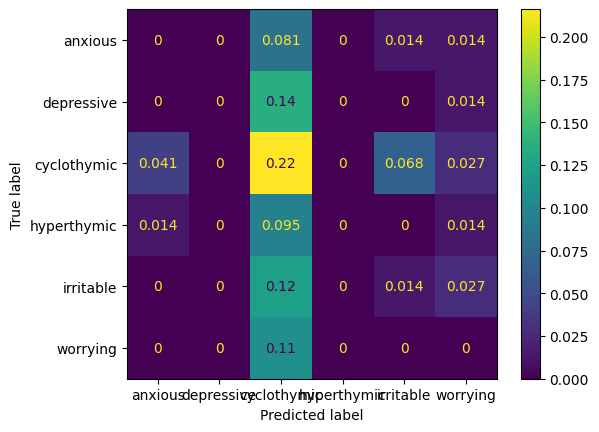

In [24]:
# import sklearn

# sklearn.metrics.confusion_matrix(y_true=resultados['temperamento'], y_pred=resultados['predito'], labels=users['temperamento'].unique())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=resultados['temperamento'], y_pred=resultados['predito'], normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=list(users['temperamento'].unique()))
cmd.plot()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

In [ ]:
import time
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

In [ ]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 1
BATCH_SIZE = 100
NUM_EPOCHS = 50

##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

In [ ]:
##########################
### MODEL
##########################

class MultilayerPerceptron():

    def __init__(self, num_features, num_hidden, num_classes):
        super(MultilayerPerceptron, self).__init__()
        
        self.num_classes = num_classes
        
        # hidden 1
        self.weight_1 = torch.zeros(num_hidden, num_features, 
                                    dtype=torch.float).normal_(0.0, 0.1)
        self.bias_1 = torch.zeros(num_hidden, dtype=torch.float)
        
        # output
        self.weight_o = torch.zeros(self.num_classes, num_hidden, 
                                    dtype=torch.float).normal_(0.0, 0.1)
        self.bias_o = torch.zeros(self.num_classes, dtype=torch.float)
        
    def forward(self, x):
        # hidden 1
        
        # input dim: [n_hidden, n_features] dot [n_features, n_examples] .T
        # output dim: [n_examples, n_hidden]
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        a_1 = torch.sigmoid(z_1)

        # hidden 2
        # input dim: [n_classes, n_hidden] dot [n_hidden, n_examples] .T
        # output dim: [n_examples, n_classes]
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)
        return a_1, a_2

    def backward(self, x, a_1, a_2, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = torch.FloatTensor(y.size(0), self.num_classes)
        y_onehot.zero_()
        y_onehot.scatter_(1, y.view(-1, 1).long(), 1)
        

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        dloss_da2 = 2.*(a_2 - y_onehot) / y.size(0)

        # input/output dim: [n_examples, n_classes]
        da2_dz2 = a_2 * (1. - a_2) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = dloss_da2 * da2_dz2 # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        dz2__dw_out = a_1
        
        # input dim: [n_classlabels, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classlabels, n_hidden]
        dloss__dw_out = torch.mm(delta_out.t(), dz2__dw_out)
        dloss__db_out = torch.sum(delta_out, dim=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        dz2__a1 = self.weight_o
        
        # output dim: [n_examples, n_hidden]
        dloss_a1 = torch.mm(delta_out, dz2__a1)
        
        # [n_examples, n_hidden]
        da1__dz1 = a_1 * (1. - a_1) # sigmoid derivative
        
        # [n_examples, n_features]
        dz1__dw1 = x
        
        # output dim: [n_hidden, n_features]
        dloss_dw1 = torch.mm((dloss_a1 * da1__dz1).t(), dz1__dw1)
        dloss_db1 = torch.sum((dloss_a1 * da1__dz1), dim=0)

        return dloss__dw_out, dloss__db_out, dloss_dw1, dloss_db1

In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################

def to_onehot(y, num_classes):
    y_onehot = torch.FloatTensor(y.size(0), num_classes)
    y_onehot.zero_()
    y_onehot.scatter_(1, y.view(-1, 1).long(), 1).float()
    return y_onehot


def loss_func(targets_onehot, probas_onehot):
    return torch.mean(torch.mean((targets_onehot - probas_onehot)**2, dim=0))


def compute_mse(net, data_loader):
    curr_mse, num_examples = torch.zeros(model.num_classes).float(), 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28)
            logits, probas = net.forward(features)
            y_onehot = to_onehot(targets, model.num_classes)
            loss = torch.sum((y_onehot - probas)**2, dim=0)
            num_examples += targets.size(0)
            curr_mse += loss

        curr_mse = torch.mean(curr_mse/num_examples, dim=0)
        return curr_mse


def train(model, data_loader, num_epochs,
          learning_rate=0.1):
    
    minibatch_cost = []
    epoch_cost = []
    
    for e in range(num_epochs):
        
        for batch_idx, (features, targets) in enumerate(train_loader):
            
            features = features.view(-1, 28*28)
            
            #### Compute outputs ####
            a_1, a_2 = model.forward(features)

            #### Compute gradients ####
            dloss__dw_out, dloss__db_out, dloss_dw1, dloss_db1 = \
                model.backward(features, a_1, a_2, targets)

            #### Update weights ####
            model.weight_1 -= learning_rate * dloss_dw1
            model.bias_1 -= learning_rate * dloss_db1
            model.weight_o -= learning_rate * dloss__dw_out
            model.bias_o -= learning_rate * dloss__db_out
            
            #### Logging ####
            curr_cost = loss_func(to_onehot(targets, model.num_classes), a_2)
            minibatch_cost.append(curr_cost)
            if not batch_idx % 50:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(e+1, NUM_EPOCHS, batch_idx, 
                         len(train_loader), curr_cost))
        
        #### Logging ####        
        curr_cost = compute_mse(model, train_loader)
        epoch_cost.append(curr_cost)
        print('Epoch: %03d/%03d |' % (e+1, NUM_EPOCHS), end="")
        print(' Train MSE: %.5f' % curr_cost)

    return minibatch_cost, epoch_cost

In [ ]:
####################################################
##### Training 
###################################################

torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden=50,
                             num_classes=10)

minibatch_cost, epoch_cost = train(model, 
                                   train_loader,
                                   num_epochs=NUM_EPOCHS,
                                   learning_rate=0.1)

In [ ]:
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Minibatch')
plt.show()

plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28)
            _, outputs = net.forward(features)
            predicted_labels = torch.argmax(outputs, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    
print('Training Accuracy: %.2f' % compute_accuracy(model, train_loader))
print('Test Accuracy: %.2f' % compute_accuracy(model, test_loader))